# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [40]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.64e-20
Time:                        16:51:14   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
y, X = patsy.dmatrices('tip ~ net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           5.02e-23
Time:                        17:23:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

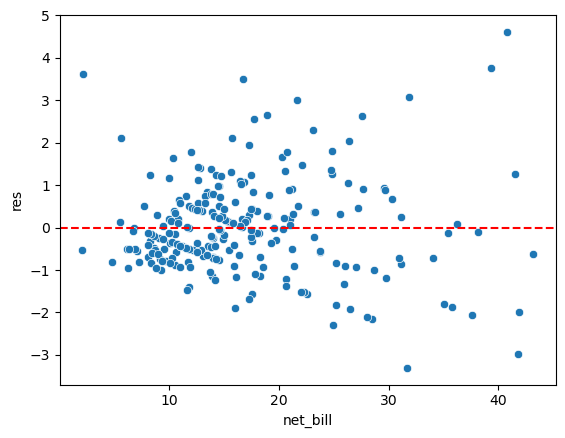

In [76]:
tips['res']= pd.Series(modelo.resid)

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill) + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           4.40e-20
Time:                        16:46:38   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill,2) + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.47e-20
Time:                        16:46:33   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [48]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.85e-05
Time:                        16:51:52   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

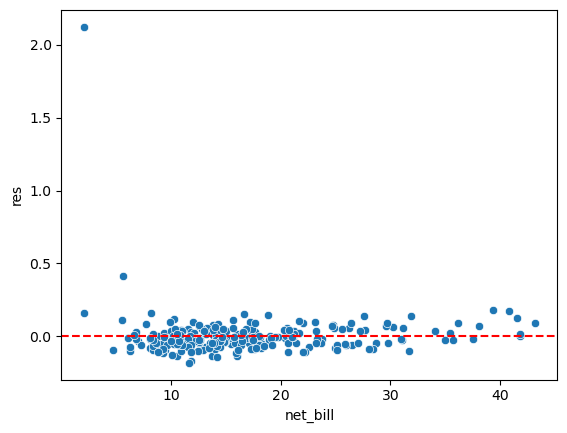

In [49]:
tips['res']= pd.Series(modelo.resid)

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [50]:
y, X = patsy.dmatrices('tip_pct ~ np.log(net_bill) + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.62e-13
Time:                        16:52:18   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
y, X = patsy.dmatrices('tip_pct ~ np.power(net_bill,2) + 1', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           0.000297
Time:                        16:53:56   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2388      0.014     16.725      0.000       0.211       0.267
np.power(net_bill, 2)    -0.0001   2.89e-05     -3.672      0.000      -0.000   -4.91e-05
==============================================================================
Omnibus:                      471.934   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242314.902
Skew:                          11.261   Prob(JB):                         0.00
Kurtosis:                     155.732   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
O modelo do item 1 tem um R2 melhor

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [57]:
prev_renda = pd.read_csv('previsao_de_renda.csv')

In [98]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + 1', prev_renda)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:43:13   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

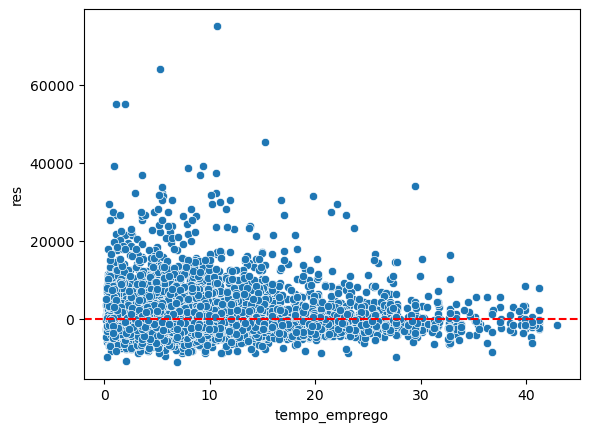

In [99]:
prev_renda['res']= pd.Series(modelo.resid)

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = prev_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [100]:
y, X = patsy.dmatrices('renda ~ qt_pessoas_residencia + tempo_emprego + idade+posse_de_imovel + posse_de_veiculo +\
                       qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + 1', prev_renda)


modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:44:43   Log-Likelihood:            -1.2234e+05
No. Observations:               12466   AIC:                         2.447e+05
Df Residuals:                   12442   BIC:                         2.449e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1959.9362   1720.493      1.139      0.255   -1412.497    5332.369
posse_de_imovel[T.True]            292.8562     85.781      3.414      0.001     124.713     460.999
posse_de_veiculo[T.True]           665.0130     82.334      8.077      0.000     503.625     826.401
tipo_renda[T.Bolsista]           -1190.6545   2216.794     -0.537      0.591   -5535.913    3154.604
tipo_renda[T.Empresário]           936.3154     92.657     10.105      0.000     754.693    1117.938
tipo_renda[T.Pensionista]         1567.1367   1478.311      1.060      0.289   -1330.581    4464.854
tipo_renda[T.Servidor público]     257.5791    134.060      1.921      0.055      -5.199     520.358
educacao[T.Pós graduação]         1258.5265   1111.323      1.132      0.257    -919.839    3436.891
educacao[T.Secundário]            -570.4994    450.104     -1.267      0.205   -1452.774     311.775
educacao[T.Superior completo]     -122.8230    451.825     -0.272      0.786   -1008.469     762.823
educacao[T.Superior incompleto]   -707.5726    484.163     -1.461      0.144   -1656.607     241.461
estado_civil[T.Separado]          -300.4456    829.117     -0.362      0.717   -1925.643    1324.751
estado_civil[T.Solteiro]           124.9802    813.994      0.154      0.878   -1470.573    1720.534
estado_civil[T.União]             -279.9224    147.574     -1.897      0.058    -569.189       9.345
estado_civil[T.Viúvo]             -788.7883    851.127     -0.927      0.354   -2457.128     879.551
tipo_residencia[T.Casa]           -723.3702    337.707     -2.142      0.032   -1385.329     -61.412
tipo_residencia[T.Com os pais]   -1026.0090    378.719     -2.709      0.007   -1768.356    -283.662
tipo_residencia[T.Comunitário]    -799.4537    652.101     -1.226      0.220   -2077.673     478.765
tipo_residencia[T.Estúdio]        -552.9256    562.742     -0.983      0.326   -1655.987     550.136
tipo_residencia[T.Governamental] -1343.7275    408.231     -3.292      0.001   -2143.924    -543.531
qt_pessoas_residencia              107.2833    810.355      0.132      0.895   -1481.137    1695.704
tempo_emprego                      284.4195      6.290     45.221      0.000     272.091     296.748
idade                               21.7143      4.935      4.400      0.000      12.040      31.389
qtd_filhos                           0.5337    811.885      0.001      0.999   -1590.886    1591.953
==============================================================================
Omnibus:                     9938.976   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388777.419
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      29.428   

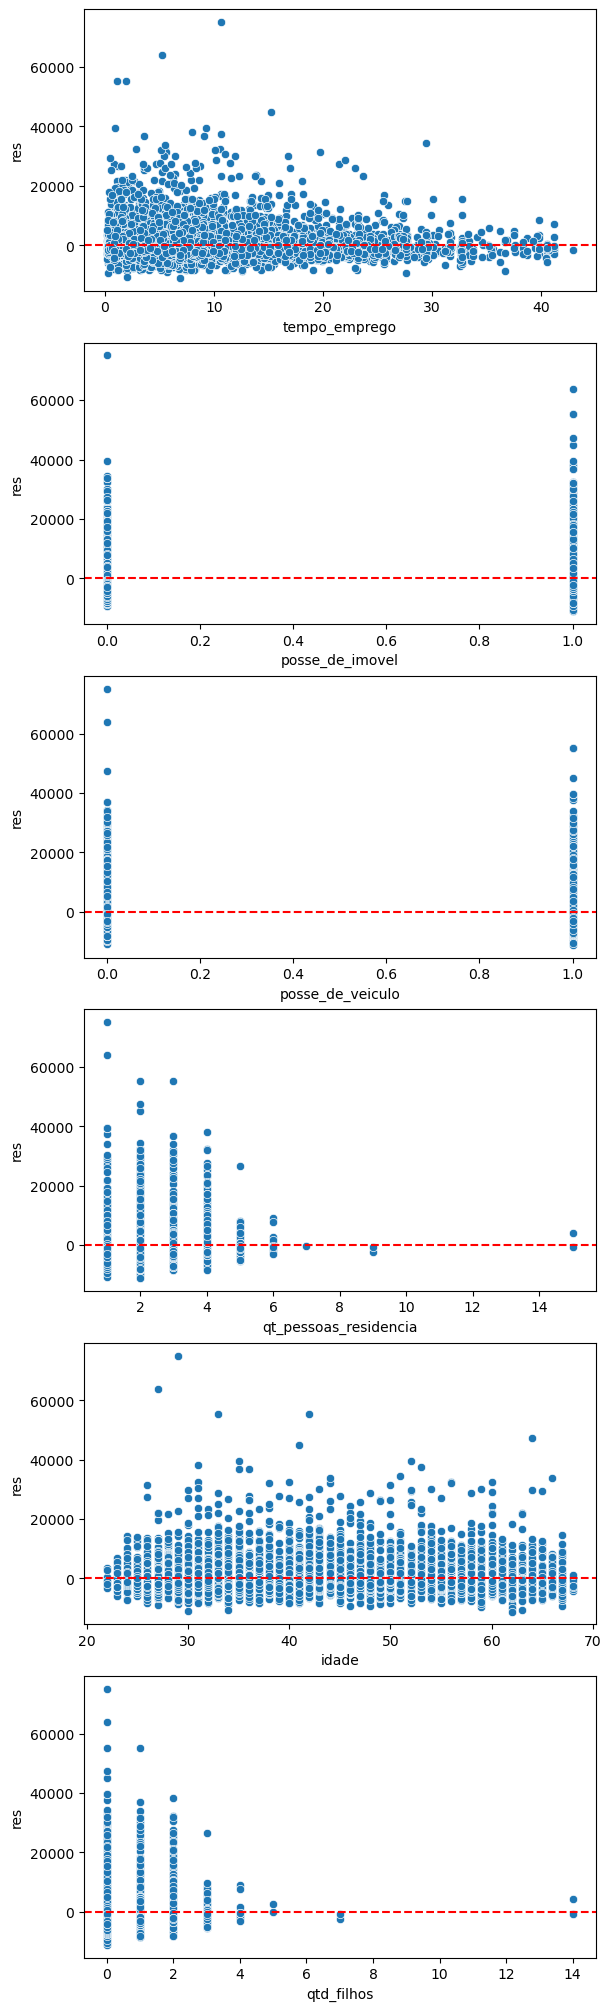

In [121]:
prev_renda['res']= pd.Series(modelo.resid)
f , axs = plt.subplots(6, figsize=(6,20), layout='constrained')

sns.scatterplot(ax= axs[0],x = 'tempo_emprego', y = 'res', data = prev_renda)
axs[0].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[1],x = 'posse_de_imovel', y = 'res', data = prev_renda)
axs[1].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[2],x = 'posse_de_veiculo', y = 'res', data = prev_renda)
axs[2].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[3],x = 'qt_pessoas_residencia', y = 'res', data = prev_renda)
axs[3].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[4],x = 'idade', y = 'res', data = prev_renda)
axs[4].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[5],x = 'qtd_filhos', y = 'res', data = prev_renda)
axs[5].axhline(y=0, color='r', linestyle='--')

In [156]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + posse_de_imovel + posse_de_veiculo + 1', prev_renda)

modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     807.2
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:17:21   Log-Likelihood:            -1.2244e+05
No. Observations:               12466   AIC:                         2.449e+05
Df Residuals:                   12462   BIC:                         2.449e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2037.2352     90.083     22.615      0.000    1860.659    2213.811
posse_de_imovel[T.True]    407.5860     83.852      4.861      0.000     243.224     571.948
posse_de_veiculo[T.True]   745.8561     81.209      9.184      0.000     586.674     905.038
tempo_emprego              288.1012      5.914     48.715      0.000     276.509     299.694
==============================================================================
Omnibus:                    10021.303   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398520.856
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      29.759   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

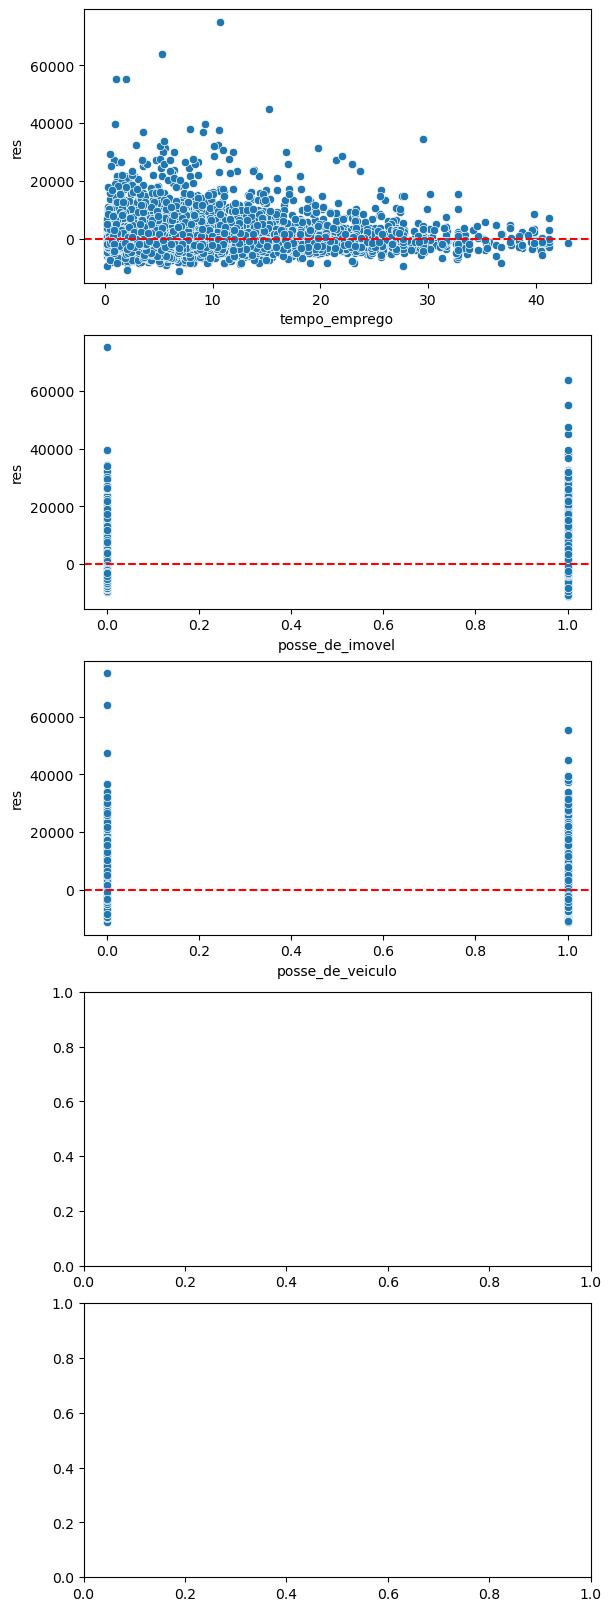

In [157]:
prev_renda['res']= pd.Series(modelo.resid)
f , axs = plt.subplots(5, figsize=(6,16), layout='constrained')

sns.scatterplot(ax= axs[0],x = 'tempo_emprego', y = 'res', data = prev_renda)
axs[0].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[1],x = 'posse_de_imovel', y = 'res', data = prev_renda)
axs[1].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(ax= axs[2],x = 'posse_de_veiculo', y = 'res', data = prev_renda)
axs[2].axhline(y=0, color='r', linestyle='--')

In [ ]:
## Acredito que uma possibilidade seria limititar a renda <= 40.000